In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
train= pd.read_csv('/content/train_LZdllcl.csv')
test= pd.read_csv('/content/test_2umaH9m.csv')
train

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                      8              1            0                  49   
1                      4              0            0                  60   
2                      7              0            0                  50   
3                     10              0            0                  50   
4                      2              0            0                  73   
...                  ...            ...          ...                 ...   
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0  

[54808 rows x 14 columns]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print('the shape of train data',train.shape)
print('the shape of test data', test.shape)

the shape of train data (54808, 14)
the shape of test data (23490, 13)


In [5]:
#columns in the train data
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
#columns in test data
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [7]:
train.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [8]:
train.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [9]:
train.describe(include = 'object')

department    region   education gender recruitment_channel
count               54808     54808       52399  54808               54808
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                16840     12343       36669  38496               30446

In [10]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [11]:
pd.value_counts(train.dtypes)

int64      8
object     5
float64    1
dtype: int64

In [12]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [13]:
unique_values= train.select_dtypes(include='number').nunique()

fig = px.bar(unique_values, title='Number of Unique Values', labels = {'x':'', 'y':'Features'}, log_y=True)
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(showlegend=False)

In [14]:
#Check Number of Duplicates
n_duplicates = train.duplicated().sum()
print(f'We have {n_duplicates} duplicates in our dataset')

We have 0 duplicates in our dataset


In [15]:
px.imshow(train.isna(),title='Rows with Missing Values',labels={'x': 'Features', 'y': 'Rows'})

In [16]:
#total missing data
train_total = train.isnull().sum()
test_total = test.isnull().sum()
#percentage of missing values
train_percent= ((train.isnull().sum()/train.shape[0])*100)
test_percent= ((test.isnull().sum()/test.shape[0])*100)

'''
Create a dataframe to show total number of missing values
and percentage of missing values in both training and test data
'''
data_missing= pd.DataFrame({'train total':train_total, 'train percent': train_percent,'test total': test_total, 'test percent': test_percent})
data_missing.sort_values(by='train total', ascending=False).head()

train total  train percent  test total  test percent
previous_year_rating         4124       7.524449      1812.0      7.713921
education                    2409       4.395344      1034.0      4.401873
KPIs_met >80%                   0       0.000000         0.0      0.000000
age                             0       0.000000         0.0      0.000000
avg_training_score              0       0.000000         0.0      0.000000

In [17]:
train[train['previous_year_rating'].isnull()]

employee_id         department     region   education gender  \
10           29934         Technology  region_23         NaN      m   
23           71177        Procurement   region_5  Bachelor's      m   
29           74759  Sales & Marketing   region_4  Bachelor's      m   
56           45709  Sales & Marketing  region_31  Bachelor's      f   
58           26599  Sales & Marketing  region_16  Bachelor's      m   
...            ...                ...        ...         ...    ...   
54703        74615                R&D  region_31  Bachelor's      m   
54734        11685         Operations  region_15  Bachelor's      m   
54746        10546            Finance   region_6  Bachelor's      m   
54773        37919            Finance   region_2  Bachelor's      m   
54801        12431         Technology  region_26  Bachelor's      f   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
10               sourcing                1   30                   NaN   
23                  other                1   27                   NaN   
29               sourcing                1   26                   NaN   
56                  other                1   29                   NaN   
58                  other                2   27                   NaN   
...                   ...              ...  ...                   ...   
54703            sourcing                1   30                   NaN   
54734            sourcing                1   31                   NaN   
54746               other                1   28                   NaN   
54773               other                1   23                   NaN   
54801            sourcing                1   31                   NaN   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
10                     1              0            0                  77   
23                     1              0            0                  70   
29                     1              0            0                  44   
56                     1              0            0                  49   
58                     1              1            0                  47   
...                  ...            ...          ...                 ...   
54703                  1              1            0                  88   
54734                  1              1            0                  56   
54746                  1              1            0                  61   
54773                  1              1            0                  61   
54801                  1              0            0                  78   

       is_promoted  
10               0  
23               0  
29               0  
56               0  
58               0  
...            ...  
54703            0  
54734            1  
54746            0  
54773            0  
54801            0  

[4124 rows x 14 columns]

In [18]:
train.query('length_of_service==1 & previous_year_rating.isnull()', engine='python')

employee_id         department     region   education gender  \
10           29934         Technology  region_23         NaN      m   
23           71177        Procurement   region_5  Bachelor's      m   
29           74759  Sales & Marketing   region_4  Bachelor's      m   
56           45709  Sales & Marketing  region_31  Bachelor's      f   
58           26599  Sales & Marketing  region_16  Bachelor's      m   
...            ...                ...        ...         ...    ...   
54703        74615                R&D  region_31  Bachelor's      m   
54734        11685         Operations  region_15  Bachelor's      m   
54746        10546            Finance   region_6  Bachelor's      m   
54773        37919            Finance   region_2  Bachelor's      m   
54801        12431         Technology  region_26  Bachelor's      f   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
10               sourcing                1   30                   NaN   
23                  other                1   27                   NaN   
29               sourcing                1   26                   NaN   
56                  other                1   29                   NaN   
58                  other                2   27                   NaN   
...                   ...              ...  ...                   ...   
54703            sourcing                1   30                   NaN   
54734            sourcing                1   31                   NaN   
54746               other                1   28                   NaN   
54773               other                1   23                   NaN   
54801            sourcing                1   31                   NaN   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
10                     1              0            0                  77   
23                     1              0            0                  70   
29                     1              0            0                  44   
56                     1              0            0                  49   
58                     1              1            0                  47   
...                  ...            ...          ...                 ...   
54703                  1              1            0                  88   
54734                  1              1            0                  56   
54746                  1              1            0                  61   
54773                  1              1            0                  61   
54801                  1              0            0                  78   

       is_promoted  
10               0  
23               0  
29               0  
56               0  
58               0  
...            ...  
54703            0  
54734            1  
54746            0  
54773            0  
54801            0  

[4124 rows x 14 columns]

In [19]:
#testing the hypothesis

hypothesis = train.query('length_of_service != 1')['previous_year_rating'].isna().any()

print(f' Is there any row with null values for previous_year_rating column and 1 for length_of_service?   {hypothesis}')

 Is there any row with null values for previous_year_rating column and 1 for length_of_service?   False


In [20]:
#Checking for pattern for missing values in 'education' column
train[train['education'].isnull()]

employee_id         department     region education gender  \
10           29934         Technology  region_23       NaN      m   
21           33332         Operations  region_15       NaN      m   
32           35465  Sales & Marketing   region_7       NaN      f   
43           17423  Sales & Marketing   region_2       NaN      m   
82           66013  Sales & Marketing   region_2       NaN      m   
...            ...                ...        ...       ...    ...   
54692        14821  Sales & Marketing   region_2       NaN      f   
54717         7684          Analytics   region_2       NaN      m   
54729         1797                 HR   region_2       NaN      f   
54742        38935  Sales & Marketing  region_31       NaN      m   
54806        13614  Sales & Marketing   region_9       NaN      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
10               sourcing                1   30                   NaN   
21               sourcing                1   41                   4.0   
32               sourcing                1   24                   1.0   
43                  other                3   24                   2.0   
82               sourcing                2   25                   3.0   
...                   ...              ...  ...                   ...   
54692            sourcing                1   35                   3.0   
54717            sourcing                1   32                   3.0   
54729               other                1   28                   3.0   
54742               other                1   28                   4.0   
54806            sourcing                1   29                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
10                     1              0            0                  77   
21                    11              0            0                  57   
32                     2              0            0                  48   
43                     2              0            0                  48   
82                     2              0            0                  53   
...                  ...            ...          ...                 ...   
54692                  7              0            0                  53   
54717                  4              0            0                  86   
54729                  2              0            0                  53   
54742                  3              0            0                  47   
54806                  2              0            0                  45   

       is_promoted  
10               0  
21               0  
32               0  
43               0  
82               0  
...            ...  
54692            0  
54717            0  
54729            0  
54742            0  
54806            0  

[2409 rows x 14 columns]

In [21]:
'''
Impute missing values.
Mode values are imputed in missing education values because this is an ordinal variable.
0 will be imputed in place of the missing values in previous_year_rating.
'''

#fill the missing values in education
train['education']=train['education'].fillna(train.education.mode()[0])
test['education']=test['education'].fillna(test.education.mode()[0])

#fill the missing values in previous_year_rating
train['previous_year_rating']=train['previous_year_rating'].fillna(0)
test['previous_year_rating']=test['previous_year_rating'].fillna(0)

In [22]:
#check if the null values are still present
print('Number of missing values in the training dataset', train.isnull().sum().sum())
print('Number of missing values in the test dataset', test.isnull().sum().sum())

Number of missing values in the training dataset 0
Number of missing values in the test dataset 0


In [23]:
#Since outliers are only posssible in numerical data, let's analyze the numerical columns
train.select_dtypes('number').columns.to_list()

['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [24]:
fig=px.box(train,y='avg_training_score',points='outliers', title='Outliers in Average Training Score')
fig.update_layout(hovermode='x')

In [25]:
fig=px.box(train,y='length_of_service', points='outliers', title='Outliers in Length of Service Column')
fig.update_layout(hovermode='x')

In [26]:
train['length_of_service']=np.where( train['length_of_service']>13,13, train['length_of_service'])
train['length_of_service'].max()

13

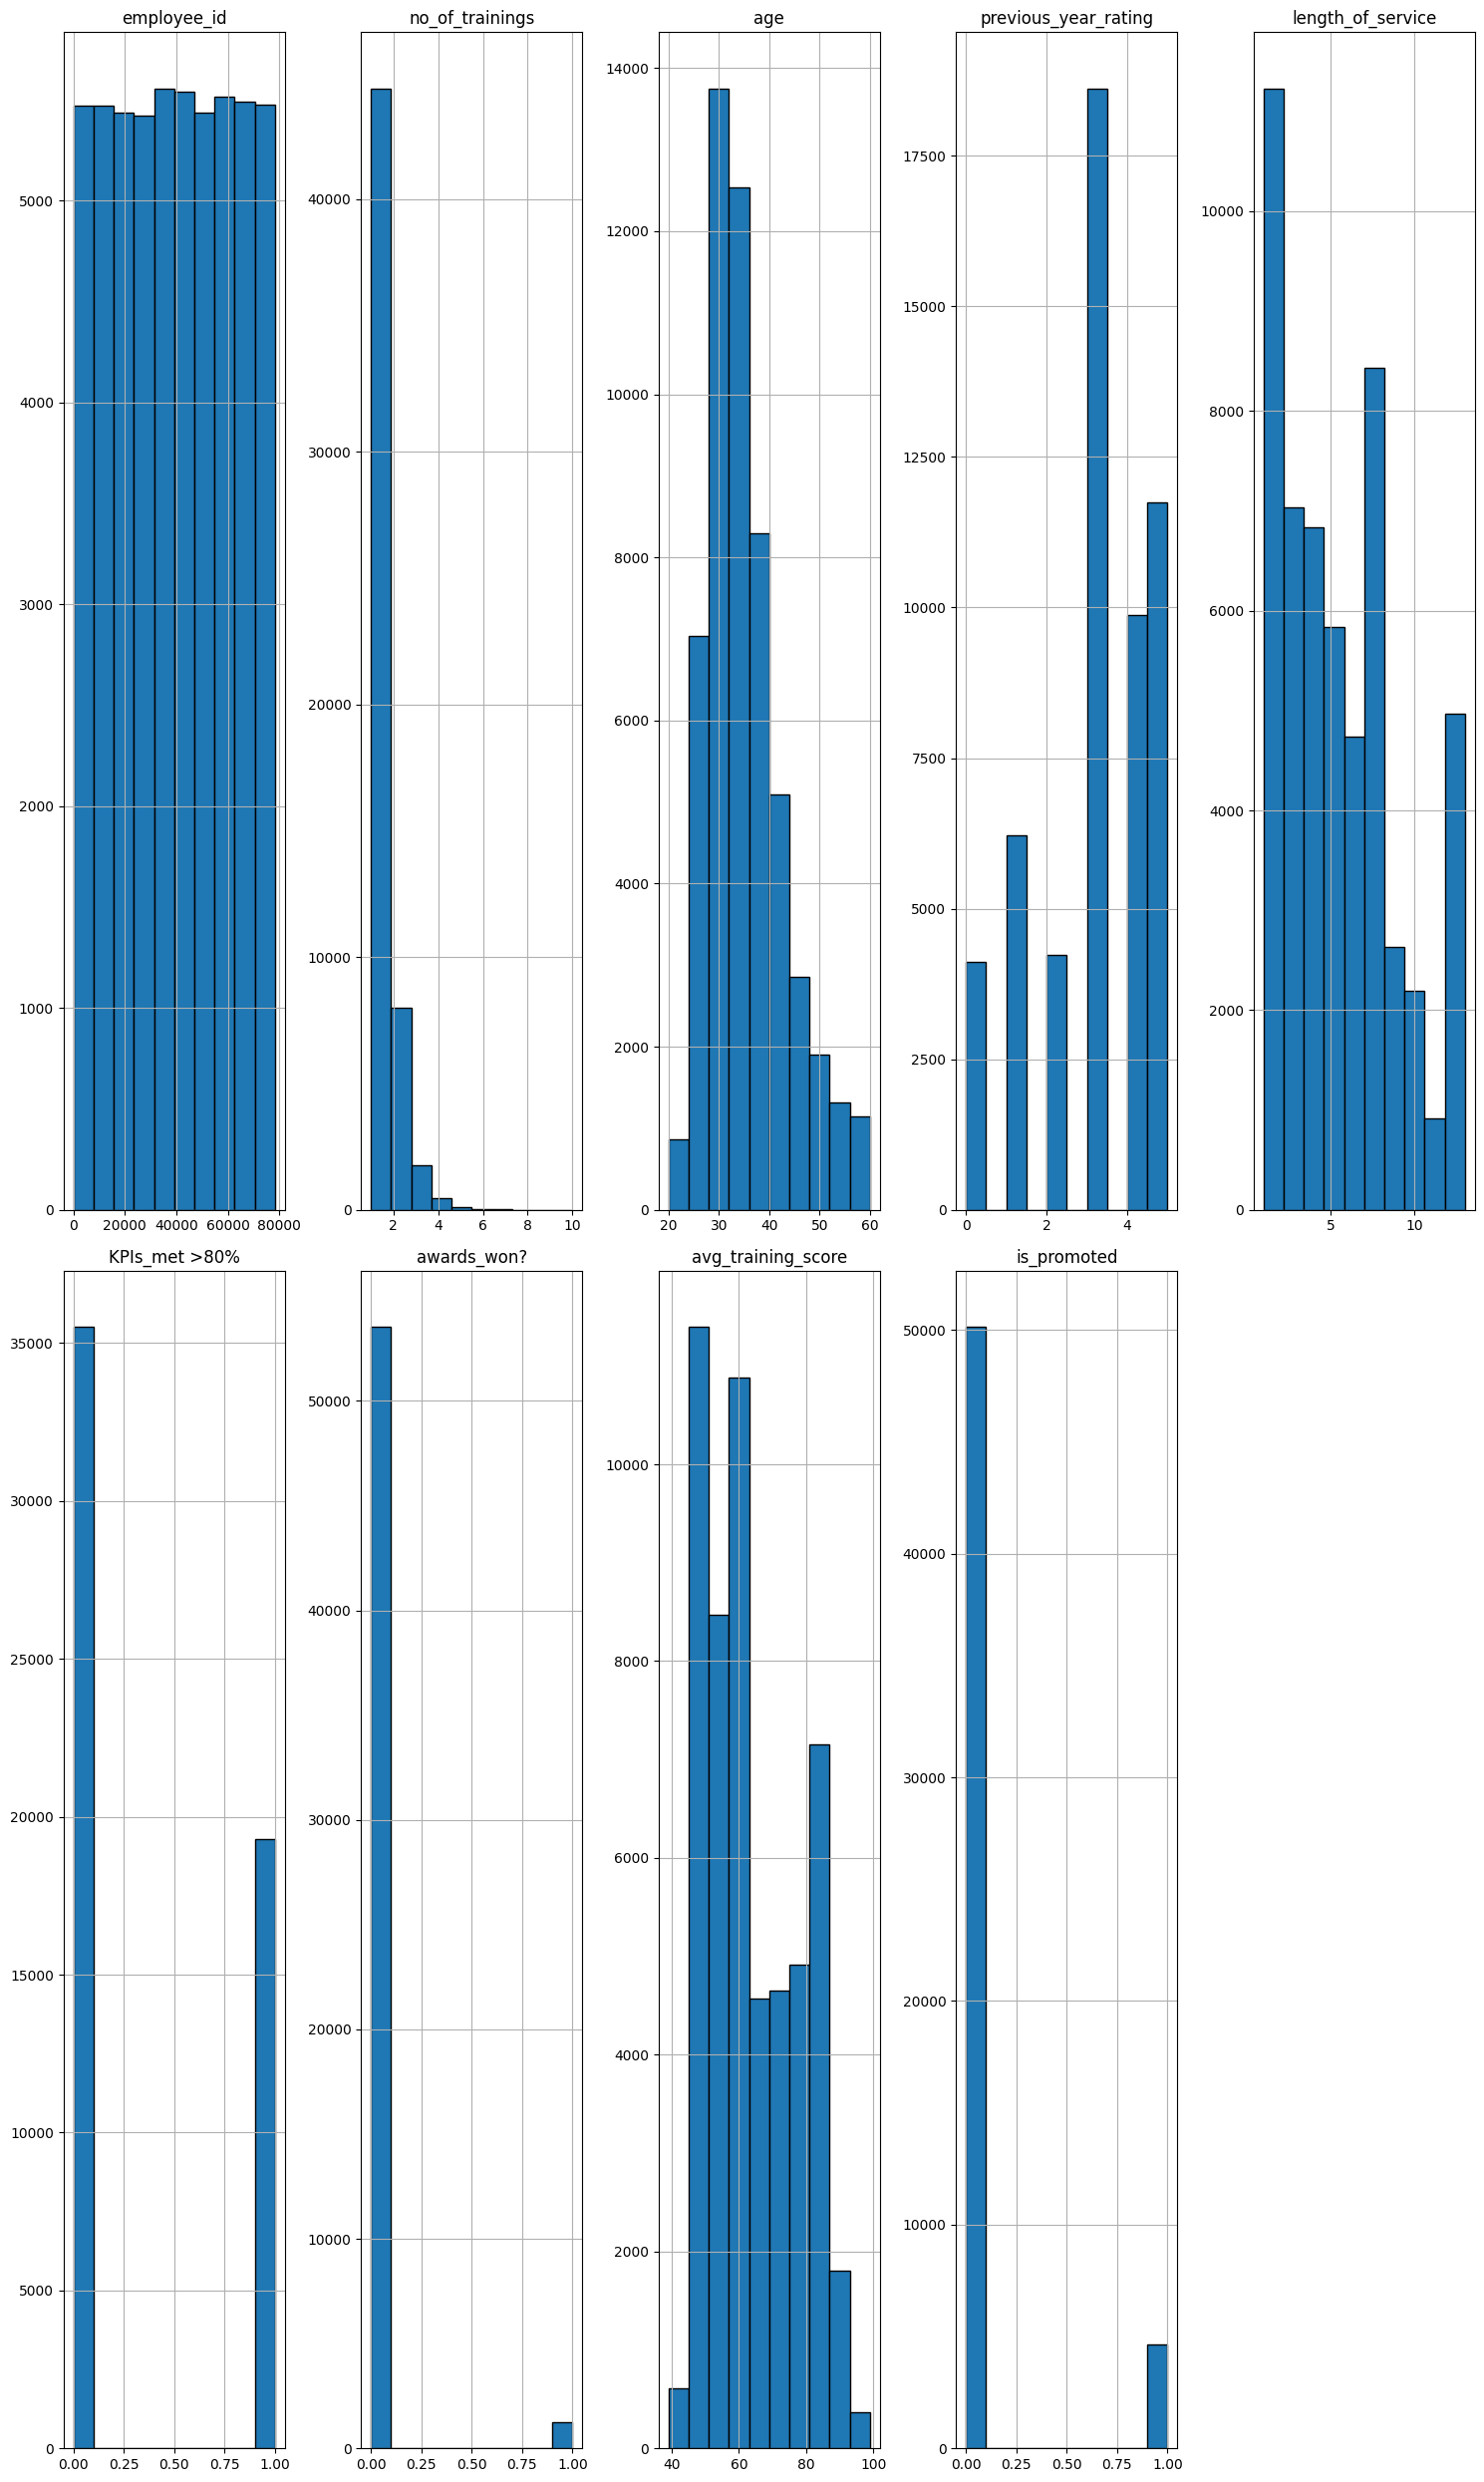

In [27]:
train.hist(bins=10, figsize=(15,25), layout=(-1, 5), edgecolor='black')
plt.tight_layout();

In [28]:
px.histogram(train,'is_promoted',facet_col='gender', color='is_promoted', marginal='rug')

In [29]:
px.box( train,'recruitment_channel','length_of_service', color='recruitment_channel')

In [30]:
px.histogram(train, 'age',color='education', facet_col='education', barmode='group')

In [31]:
px.sunburst(train,path=[ 'gender','recruitment_channel'], values='no_of_trainings')

In [32]:
px.strip(train, 'length_of_service','age')

In [33]:
px.imshow(train.corr(), text_auto= True, title='Correlation Between the Variables in the Model', height=1000)

<ipython-input-33-eaf724959097>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [34]:
#Creating a sum metric column
train['sum_metric'] = train['awards_won?']+ train['previous_year_rating']
test['sum_metric'] = test['awards_won?'] + test['previous_year_rating']

# creating a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [35]:
#Remove uneccessary features
train = train.drop(['region', 'employee_id'], axis = 1)
test = test.drop([ 'region', 'employee_id'], axis = 1)
train.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'sum_metric', 'total_score'],
      dtype='object')

In [36]:
train.length_of_service.head()

0     8
1     4
2     7
3    10
4     2
Name: length_of_service, dtype: int64

In [37]:
train.select_dtypes('object').head()

department         education gender recruitment_channel
0  Sales & Marketing  Master's & above      f            sourcing
1         Operations        Bachelor's      m               other
2  Sales & Marketing        Bachelor's      m            sourcing
3  Sales & Marketing        Bachelor's      m               other
4         Technology        Bachelor's      m               other

In [38]:
train.education.value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [39]:
train['education']=train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),(3,2,1))
test['education']=test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),(3,2,1))

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['department']=le.fit_transform(train['department'])
test['department']=le.fit_transform(test['department'])
train['gender']=le.fit_transform(train['gender'])
test['gender']=le.fit_transform(test['gender'])
train['recruitment_channel']=le.fit_transform(train['recruitment_channel'])
test['recruitment_channel']=le.fit_transform(test['recruitment_channel'])

print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [41]:
train.head()

department  education  gender  recruitment_channel  no_of_trainings  age  \
0           7          3       0                    2                1   35   
1           4          2       1                    0                1   30   
2           7          2       1                    2                1   34   
3           7          2       1                    0                2   39   
4           8          2       1                    0                1   45   

   previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
0                   5.0                  8              1            0   
1                   5.0                  4              0            0   
2                   3.0                  7              0            0   
3                   1.0                 10              0            0   
4                   3.0                  2              0            0   

   avg_training_score  is_promoted  sum_metric  total_score  
0                  49            0         5.0           49  
1                  60            0         5.0           60  
2                  50            0         3.0           50  
3                  50            0         1.0          100  
4                  73            0         3.0           73

In [42]:
y=train['is_promoted']
x=train.drop(['is_promoted'],axis=1)
x_test=test

In [43]:
px.histogram(train,x='is_promoted', color='is_promoted', title='Distribution of Target Variable')

In [44]:
from imblearn.over_sampling import RandomOverSampler

x_resample, y_resample = RandomOverSampler(sampling_strategy=1).fit_resample(x,y.values.ravel())


print(x_resample.shape)
print(y_resample.shape)

(100280, 13)
(100280,)


In [45]:
px.histogram(y_resample, x=0, color=0, title='Distribution of Target After Resampling')

In [46]:
print("Before Resampling:")
print(y.value_counts())

print("After Resampling:")
y_resample = pd.DataFrame(y_resample)
print(y_resample.value_counts())

Before Resampling:
0    50140
1     4668
Name: is_promoted, dtype: int64
After Resampling:
0    50140
1    50140
dtype: int64


In [47]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (80224, 13)
Shape of the y Train : (80224, 1)
Shape of the x Valid : (20056, 13)
Shape of the y Valid : (20056, 1)
Shape of the x Test : (23490, 13)


In [48]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()

model.fit(x_train,y_train)

y_pred=model.predict(x_valid)

<ipython-input-48-e6f9799bbb0f>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [49]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
fig = px.imshow(cm,text_auto=True, title='Confusion Matrix of the Model')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')

Training Accuracy : 0.9972950737933786
Testing Accuracy: 0.9781112883925009


In [50]:
cr=classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      9981
           1       0.96      1.00      0.98     10075

    accuracy                           0.98     20056
   macro avg       0.98      0.98      0.98     20056
weighted avg       0.98      0.98      0.98     20056



In [51]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.4 MB/s eta 0:00:00


In [52]:
# Let's pick 1,000 random samples from our validation set
x_sample = x_valid.sample(1000)

In [53]:

%%time


 #Fits the explainer
explainer = shap.Explainer(model.predict, x_sample)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_sample)

PermutationExplainer explainer: 1001it [16:05,  1.03it/s]

CPU times: user 15min 38s, sys: 2.39 s, total: 15min 41s
Wall time: 16min 5s


In [54]:
shap.initjs()
shap.plots.force(shap_values[0])

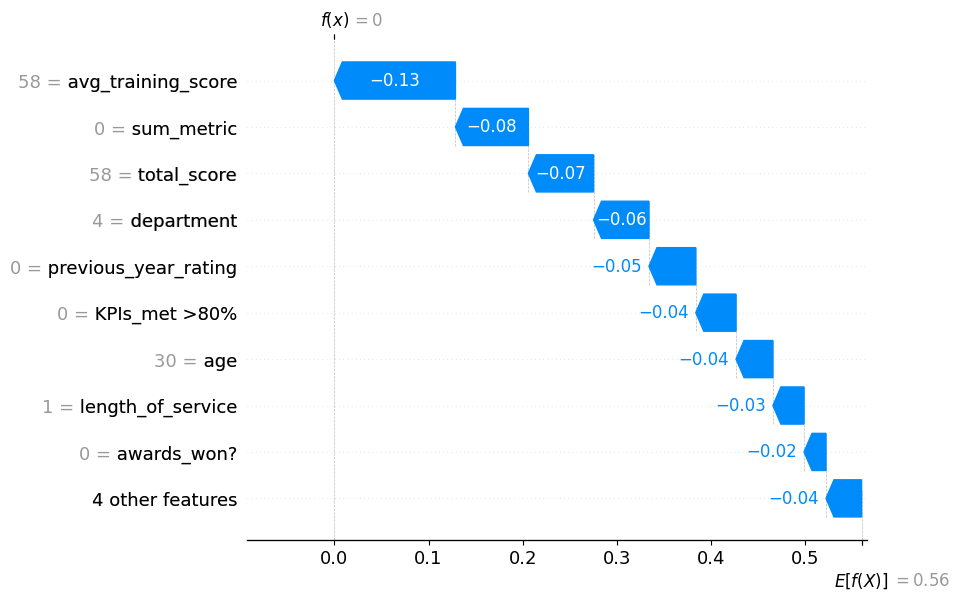

In [55]:
shap.plots.waterfall(shap_values[0])

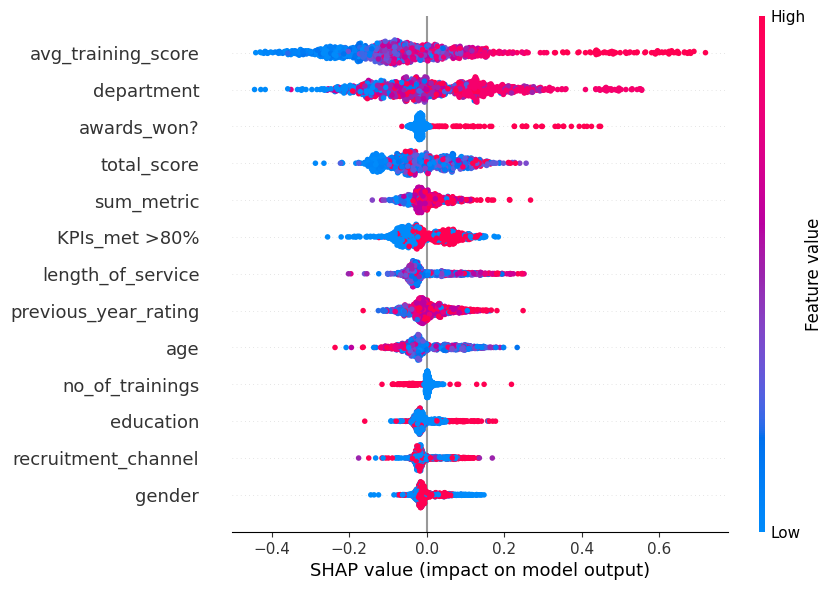

In [56]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0), max_display=20)

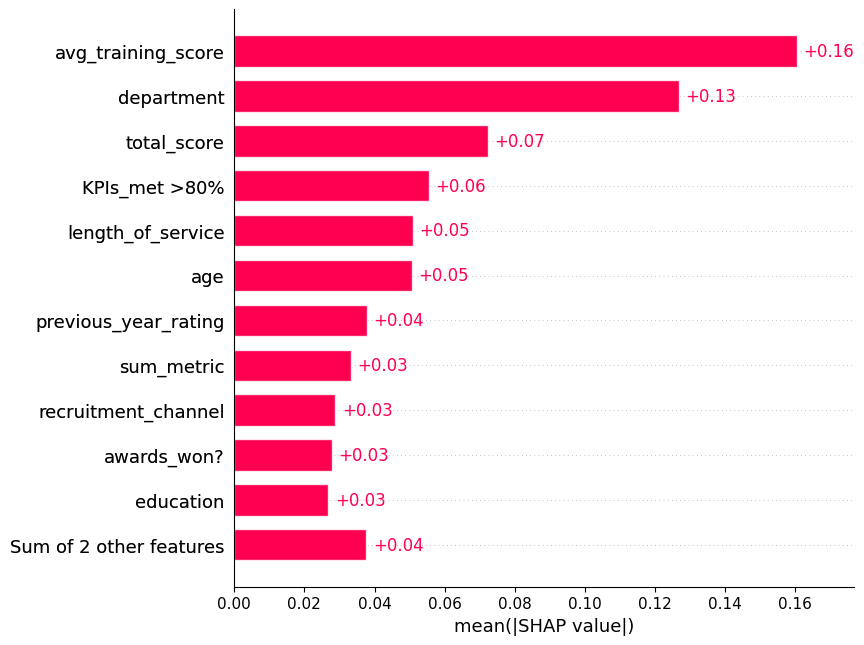

In [57]:
shap.plots.bar(shap_values, max_display=12)

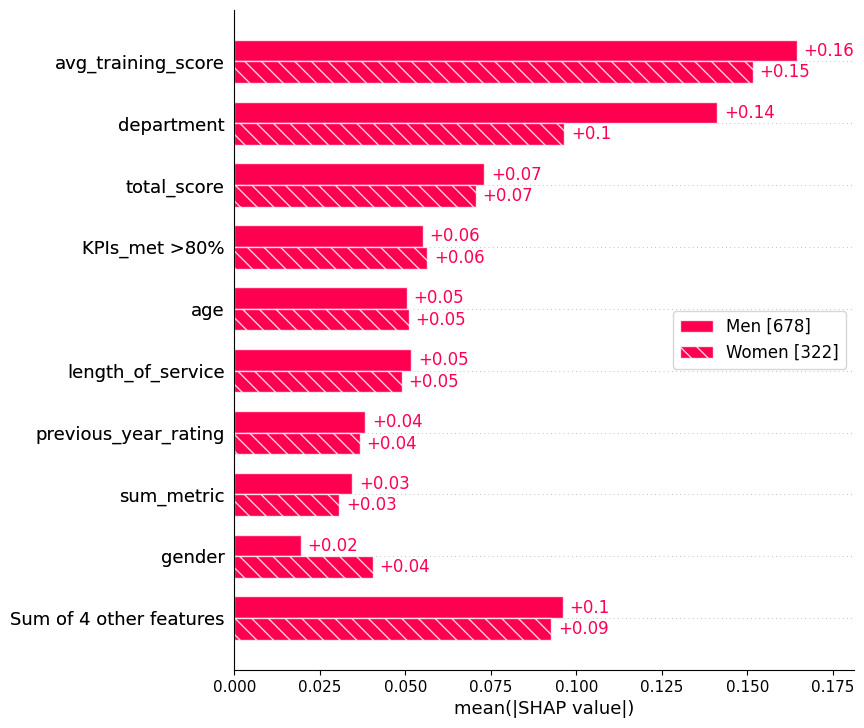

In [58]:
sex = ["Women" if shap_values[i,"gender"].data == 0 else "Men" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

In [60]:
sample_submission_M0L0uXE= pd.read_csv('/content/sample_submission_M0L0uXE(1).csv')

In [61]:
sample_submission_M0L0uXE

employee_id  is_promoted
0             8724            0
1            74430            0
2            72255            0
3            38562            0
4            64486            0
...            ...          ...
23485        53478            0
23486        25600            0
23487        45409            0
23488         1186            0
23489         5973            0

[23490 rows x 2 columns]

In [62]:
train

department  education  gender  recruitment_channel  no_of_trainings  \
0               7          3       0                    2                1   
1               4          2       1                    0                1   
2               7          2       1                    2                1   
3               7          2       1                    0                2   
4               8          2       1                    0                1   
...           ...        ...     ...                  ...              ...   
54803           8          2       1                    2                1   
54804           4          3       0                    0                1   
54805           0          2       1                    0                1   
54806           7          2       1                    2                1   
54807           2          2       1                    0                1   

       age  previous_year_rating  length_of_service  KPIs_met >80%  \
0       35                   5.0                  8              1   
1       30                   5.0                  4              0   
2       34                   3.0                  7              0   
3       39                   1.0                 10              0   
4       45                   3.0                  2              0   
...    ...                   ...                ...            ...   
54803   48                   3.0                 13              0   
54804   37                   2.0                  6              0   
54805   27                   5.0                  3              1   
54806   29                   1.0                  2              0   
54807   27                   1.0                  5              0   

       awards_won?  avg_training_score  is_promoted  sum_metric  total_score  
0                0                  49            0         5.0           49  
1                0                  60            0         5.0           60  
2                0                  50            0         3.0           50  
3                0                  50            0         1.0          100  
4                0                  73            0         3.0           73  
...            ...                 ...          ...         ...          ...  
54803            0                  78            0         3.0           78  
54804            0                  56            0         2.0           56  
54805            0                  79            0         5.0           79  
54806            0                  45            0         1.0           45  
54807            0                  49            0         1.0           49  

[54808 rows x 14 columns]

In [63]:
train

department  education  gender  recruitment_channel  no_of_trainings  \
0               7          3       0                    2                1   
1               4          2       1                    0                1   
2               7          2       1                    2                1   
3               7          2       1                    0                2   
4               8          2       1                    0                1   
...           ...        ...     ...                  ...              ...   
54803           8          2       1                    2                1   
54804           4          3       0                    0                1   
54805           0          2       1                    0                1   
54806           7          2       1                    2                1   
54807           2          2       1                    0                1   

       age  previous_year_rating  length_of_service  KPIs_met >80%  \
0       35                   5.0                  8              1   
1       30                   5.0                  4              0   
2       34                   3.0                  7              0   
3       39                   1.0                 10              0   
4       45                   3.0                  2              0   
...    ...                   ...                ...            ...   
54803   48                   3.0                 13              0   
54804   37                   2.0                  6              0   
54805   27                   5.0                  3              1   
54806   29                   1.0                  2              0   
54807   27                   1.0                  5              0   

       awards_won?  avg_training_score  is_promoted  sum_metric  total_score  
0                0                  49            0         5.0           49  
1                0                  60            0         5.0           60  
2                0                  50            0         3.0           50  
3                0                  50            0         1.0          100  
4                0                  73            0         3.0           73  
...            ...                 ...          ...         ...          ...  
54803            0                  78            0         3.0           78  
54804            0                  56            0         2.0           56  
54805            0                  79            0         5.0           79  
54806            0                  45            0         1.0           45  
54807            0                  49            0         1.0           49  

[54808 rows x 14 columns]